In [155]:
import json
import star_trek_tos_data as TOS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import scipy.stats

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [132]:
description = []
title = []
guest_num = []
guest_name = []
count = []

for movie_id in TOS.guest_movies:
    movie_dat = TOS.guest_movies[movie_id]
    
    
    # print(json.dumps(movie_dat['count'], indent = 4, sort_keys = True))
    try:
        description.append(movie_dat['overview'])
        title.append(movie_dat['original_title'])
        guest_num.append(movie_dat['guest_ids'])
        guest_name.append(movie_dat['guest_names'])
        count.append(movie_dat['count'])
        
        
    except KeyError:
        print('Error')

Error


In [133]:
len(guest_name)

3936

In [134]:
df = pd.DataFrame({'Movie Title': title,
                  'Description': description,
                  'Guest Number': guest_num,
                    'Guest Name': guest_name,
                  'Count of Guests': count})
df.head()

,Count of Guests,Description,Guest Name,Guest Number,Movie Title
0,1,"Questioned as a murder suspect, solid (but dru...",[Joseph Mell],[83913],Naked Alibi
1,2,An escaped convict gets a hold of some radioac...,"[Joseph Mell, Kathie Browne]","[83913, 16090]",City of Fear
2,3,Claude is a ruthless and efficient contract ki...,"[Joseph Mell, Kathie Browne, Phillip Pine]","[83913, 16090, 16126]",Murder by Contract
3,1,"Two federal agents (John Ireland, Richard Denn...",[Joseph Mell],[83913],The 49th Man
4,1,"Dr. Ernst Grood , having already dominated the...",[Joseph Mell],[83913],The Lost Planet


In [135]:
df['Description'].replace('', np.nan, inplace=True)
df.dropna(subset=['Description'], inplace=True)
title_clean = df['Movie Title']
guest_clean = df['Guest Name']
guest_num_clean = df['Guest Number']
count_clean = df['Count of Guests']
df

,Count of Guests,Description,Guest Name,Guest Number,Movie Title
0,1,"Questioned as a murder suspect, solid (but dru...",[Joseph Mell],[83913],Naked Alibi
1,2,An escaped convict gets a hold of some radioac...,"[Joseph Mell, Kathie Browne]","[83913, 16090]",City of Fear
2,3,Claude is a ruthless and efficient contract ki...,"[Joseph Mell, Kathie Browne, Phillip Pine]","[83913, 16090, 16126]",Murder by Contract
3,1,"Two federal agents (John Ireland, Richard Denn...",[Joseph Mell],[83913],The 49th Man
4,1,"Dr. Ernst Grood , having already dominated the...",[Joseph Mell],[83913],The Lost Planet
5,2,"Ambitious but thwarted, Rae Smith meets handso...","[Joseph Mell, Charles Drake]","[83913, 15978]",Back Street
6,3,Dave Bannion is an upright cop on the trail of...,"[Joseph Mell, John Crawford, Celia Lovsky]","[83913, 15693, 15942]",The Big Heat
7,2,"From his prison cell, young Alan Musgrave (Rod...","[Joseph Mell, Sarah Marshall]","[83913, 124010]",Lord Love a Duck
8,2,A meat-eating teenager (Michael Landon) sees a...,"[Joseph Mell, Whit Bissell]","[83913, 13786]",I Was a Teenage Werewolf
9,2,Two American gun runners at odds with each oth...,"[Clegg Hoyt, Paul Fix]","[168061, 8496]",Santiago


In [136]:
sentiments = {}

compound = []
positive = []
negative = []
neutral = []
    
for text in df['Description']:
    
    results = analyzer.polarity_scores(text)
    com = results["compound"]
    pos = results["pos"]
    neg = results["neg"]
    neu = results["neu"]
            
    compound.append(com)
    positive.append(pos)
    negative.append(neg)
    neutral.append(neu)
    
sentiments=(compound, positive, negative, neutral)

In [137]:
the_data = {'Compound': sentiments[0],
           'Positive': sentiments[1],
           'Negative': sentiments[2],
           'Neutral': sentiments[3],
            'Movie Title': title_clean,
            'Guest Number': guest_num_clean,
            'Guest Name': guest_clean,
            'Count of Guests': count_clean,
               }

In [138]:
senti_data = pd.DataFrame(the_data)

In [139]:
senti_data.head()

,Compound,Count of Guests,Guest Name,Guest Number,Movie Title,Negative,Neutral,Positive
0,-0.9582,1,[Joseph Mell],[83913],Naked Alibi,0.273,0.686,0.041
1,-0.5994,2,"[Joseph Mell, Kathie Browne]","[83913, 16090]",City of Fear,0.163,0.787,0.050
2,-0.6478,3,"[Joseph Mell, Kathie Browne, Phillip Pine]","[83913, 16090, 16126]",Murder by Contract,0.324,0.548,0.128
3,-0.8074,1,[Joseph Mell],[83913],The 49th Man,0.313,0.687,0.000
4,-0.7430,1,[Joseph Mell],[83913],The Lost Planet,0.201,0.799,0.000


In [140]:
senti_data_bottom_mood = senti_data.loc[senti_data["Compound"] < -0.975]
senti_data_bottom_mood

,Compound,Count of Guests,Guest Name,Guest Number,Movie Title,Negative,Neutral,Positive
114,-0.9819,2,"[Leonard Mudie, Elisha Cook Jr.]","[101742, 3339]",They Won't Forget,0.264,0.717,0.018
241,-0.9771,2,"[Jeffrey Hunter, Warren Stevens]","[30551, 12310]",Red Skies of Montana,0.243,0.757,0.000
559,-0.9753,1,[Paul Fix],[8496],The Last Mile,0.382,0.543,0.075
698,-0.9826,2,"[Michael J. Pollard, Clint Howard]","[6451, 15661]",Tango & Cash,0.307,0.614,0.080
872,-0.9812,1,[Clint Howard],[15661],Blackwoods,0.170,0.822,0.008
974,-0.9780,1,[Barbara Anderson],[161255],Bonanza: The Next Generation,0.144,0.856,0.000
1033,-0.9911,1,[Emily Banks],[161663],Gunfight in Abilene,0.366,0.580,0.055
1418,-0.9766,1,[Torin Thatcher],[10925],Gasbags,0.207,0.751,0.042
1430,-0.9768,1,[Sid Haig],[5695],Brotherhood of Blood,0.200,0.737,0.063
1591,-0.9774,1,[David Opatoshu],[15744],Under Siege,0.236,0.751,0.013


In [141]:
senti_data_bottom_mood['Combined']=senti_data_bottom_mood['Guest Name'].astype(str)+' in '+ senti_data_bottom_mood['Movie Title']
senti_data_bottom_mood

C:\Users\mrbal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Compound,Count of Guests,Guest Name,Guest Number,Movie Title,Negative,Neutral,Positive,Combined
114,-0.9819,2,"[Leonard Mudie, Elisha Cook Jr.]","[101742, 3339]",They Won't Forget,0.264,0.717,0.018,"['Leonard Mudie', 'Elisha Cook Jr.'] in They W..."
241,-0.9771,2,"[Jeffrey Hunter, Warren Stevens]","[30551, 12310]",Red Skies of Montana,0.243,0.757,0.000,"['Jeffrey Hunter', 'Warren Stevens'] in Red Sk..."
559,-0.9753,1,[Paul Fix],[8496],The Last Mile,0.382,0.543,0.075,['Paul Fix'] in The Last Mile
698,-0.9826,2,"[Michael J. Pollard, Clint Howard]","[6451, 15661]",Tango & Cash,0.307,0.614,0.080,"['Michael J. Pollard', 'Clint Howard'] in Tang..."
872,-0.9812,1,[Clint Howard],[15661],Blackwoods,0.170,0.822,0.008,['Clint Howard'] in Blackwoods
974,-0.9780,1,[Barbara Anderson],[161255],Bonanza: The Next Generation,0.144,0.856,0.000,['Barbara Anderson'] in Bonanza: The Next Gene...
1033,-0.9911,1,[Emily Banks],[161663],Gunfight in Abilene,0.366,0.580,0.055,['Emily Banks'] in Gunfight in Abilene
1418,-0.9766,1,[Torin Thatcher],[10925],Gasbags,0.207,0.751,0.042,['Torin Thatcher'] in Gasbags
1430,-0.9768,1,[Sid Haig],[5695],Brotherhood of Blood,0.200,0.737,0.063,['Sid Haig'] in Brotherhood of Blood
1591,-0.9774,1,[David Opatoshu],[15744],Under Siege,0.236,0.751,0.013,['David Opatoshu'] in Under Siege


In [142]:
senti_data_top_mood = senti_data.loc[senti_data["Compound"] > 0.975]
senti_data_top_mood

,Compound,Count of Guests,Guest Name,Guest Number,Movie Title,Negative,Neutral,Positive
370,0.9786,1,[Sally Kellerman],[9805],Open House,0.071,0.723,0.206
483,0.9760,1,[Paul Fix],[8496],The Plunderers,0.051,0.757,0.192
568,0.9780,1,[Paul Fix],[8496],Surrender,0.097,0.595,0.308
953,0.9926,1,[Clint Howard],[15661],The Jungle Book,0.000,0.713,0.287
1103,0.9867,1,[John Crawford],[15693],Dreamer,0.036,0.628,0.337
1116,0.9765,2,"[Richard Carlyle, Anthony Caruso]","[178296, 16004]",The Iron Mistress,0.000,0.742,0.258
1772,0.9896,1,[John Abbott],[24826],Once Upon a Time,0.036,0.697,0.266
2686,0.9764,1,[Dick Crockett],[14256],Topeka,0.030,0.715,0.255
2997,0.9758,1,[Barbara Bouchet],[16021],Racconti proibiti... di niente vestiti,0.035,0.756,0.209
3173,0.9808,2,"[Gil Perkins, Michael Ansara]","[1214919, 16074]",Brave Warrior,0.042,0.757,0.201


In [143]:
senti_data_top_mood['Combined']=senti_data_top_mood['Guest Name'].astype(str)+' in '+ senti_data_top_mood['Movie Title']

C:\Users\mrbal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
sns.barplot(x='Combined', y='Compound', data = senti_data_top_mood)

now = datetime.now()
now = now.strftime("%Y-%m-%d @ %H:%M")
plt.title('This Movie Mood Analysis Done on ({})'.format(now))

plt.ylabel('Text Polarity')
plt.xlabel('Stars and Movies')
plt.savefig(f"Mood of Movies", bbox_inches="tight")
plt.xticks(rotation=90)
#plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

In [152]:
df_new = pd.concat([senti_data_top_mood, senti_data_bottom_mood])

In [153]:
len(df_new)

39

In [156]:
sns.barplot(x='Combined', y='Compound', data = df_new)

now = datetime.now()
now = now.strftime("%Y-%m-%d @ %H:%M")
plt.title('This Movie Mood Analysis Done on ({})'.format(now))

plt.ylabel('Text Polarity')
plt.xlabel('Stars and Movies')
plt.savefig(f"Mood of Movies", bbox_inches="tight")
plt.xticks(rotation=90)
#plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

In [178]:
senti_data_top_mood.head()

,Compound,Count of Guests,Guest Name,Guest Number,Movie Title,Negative,Neutral,Positive,Combined
370,0.9786,1,[Sally Kellerman],[9805],Open House,0.071,0.723,0.206,['Sally Kellerman'] in Open House
483,0.9760,1,[Paul Fix],[8496],The Plunderers,0.051,0.757,0.192,['Paul Fix'] in The Plunderers
568,0.9780,1,[Paul Fix],[8496],Surrender,0.097,0.595,0.308,['Paul Fix'] in Surrender
953,0.9926,1,[Clint Howard],[15661],The Jungle Book,0.000,0.713,0.287,['Clint Howard'] in The Jungle Book
1103,0.9867,1,[John Crawford],[15693],Dreamer,0.036,0.628,0.337,['John Crawford'] in Dreamer


## Density Function

In [180]:
len(senti_data)

3874

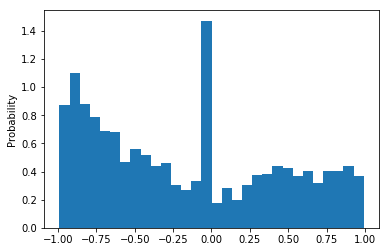

In [192]:
plt.hist(senti_data['Compound'], normed=True, bins=30)
plt.ylabel('Probability')
plt.show()